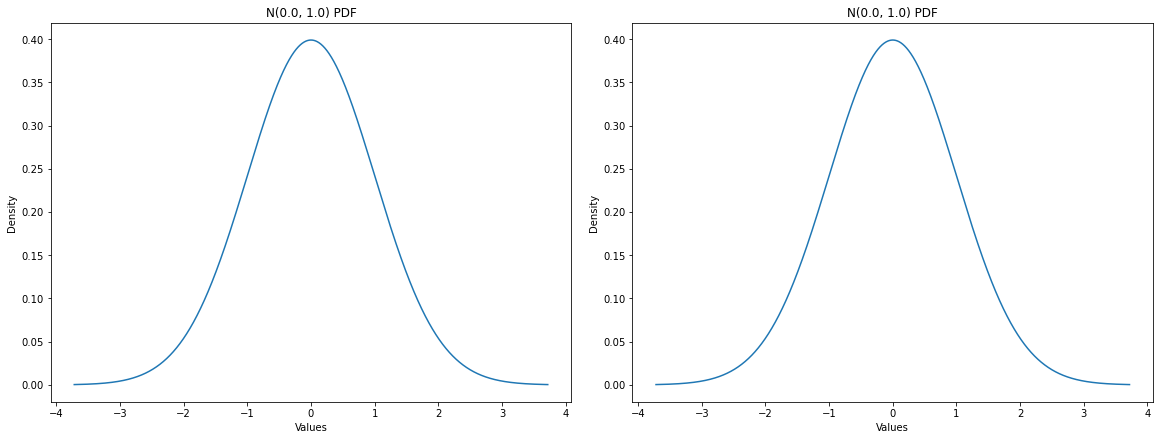

In [1]:
import function_john as fj
import function as func
import numpy as np
from scipy.stats import norm
from datetime import datetime
import matplotlib.pyplot as plt

normal = norm(loc=0, scale=1)
x = np.linspace(normal.ppf(0.0001),
                normal.ppf(0.9999), 10000)
normal_densities = normal.pdf(x)

other_normal = norm(loc=0, scale=1)
other_normal_densities = other_normal.pdf(x)

dx = x[1] - x[0]

fig, ax = plt.subplots(1, 2, figsize=(16,6), constrained_layout=True)

ax[0].plot(x, normal_densities)
ax[0].set_title(f'N({normal.mean()}, {normal.std()}) PDF')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Density')

ax[1].plot(x, other_normal_densities)
ax[1].set_title(f'N({other_normal.mean()}, {other_normal.std()}) PDF')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('Density')

plt.show()

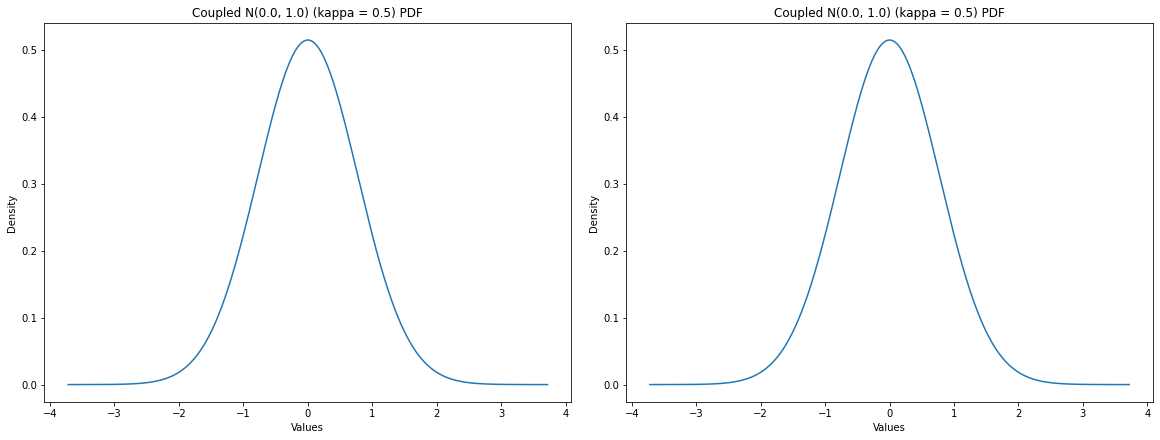

In [2]:
kappa, alpha, dim = 0.5, 2, 1

coupled_norm = fj.coupled_probability(dist=normal_densities, dx=dx, kappa=kappa, alpha=alpha, dim=dim)
coupled_other_norm = fj.coupled_probability(dist=other_normal_densities, dx=dx, kappa=kappa, alpha=alpha, dim=dim)

fig, ax = plt.subplots(1, 2, figsize=(16,6), constrained_layout=True)

ax[0].plot(x, coupled_norm)
ax[0].set_title(f'Coupled N({normal.mean()}, {normal.std()}) (kappa = {kappa}) PDF')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Density')

ax[1].plot(x, coupled_other_norm)
ax[1].set_title(f'Coupled N({other_normal.mean()}, {other_normal.std()}) (kappa = {kappa}) PDF')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('Density')

plt.show()

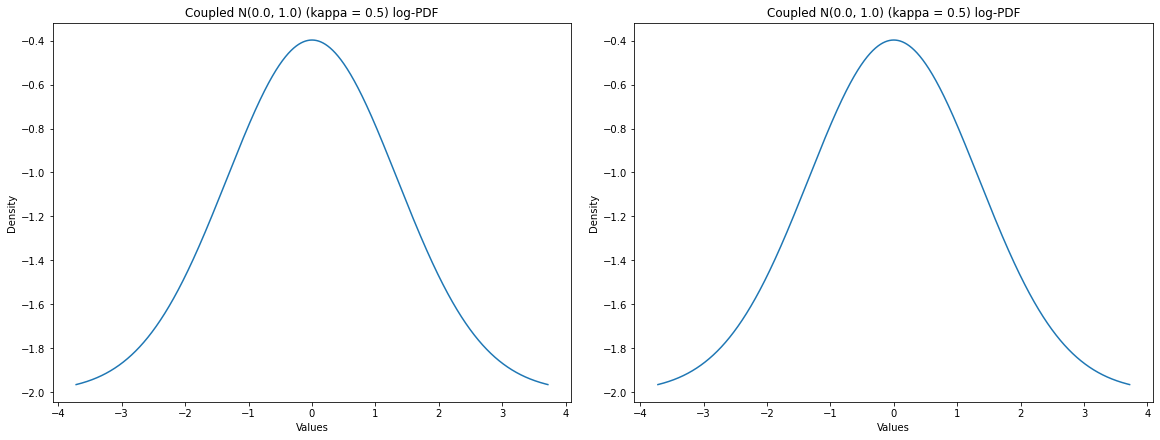

In [3]:
coupled_norm_log_densities = fj.coupled_logarithm(coupled_norm, kappa=kappa, dim=dim)
coupled_other_norm_log_densities = fj.coupled_logarithm(coupled_other_norm, kappa=kappa, dim=dim)

fig, ax = plt.subplots(1, 2, figsize=(16,6), constrained_layout=True)

ax[0].plot(x, coupled_norm_log_densities)
ax[0].set_title(f'Coupled N({normal.mean()}, {normal.std()}) (kappa = {kappa}) log-PDF')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Density')

ax[1].plot(x, coupled_other_norm_log_densities)
ax[1].set_title(f'Coupled N({other_normal.mean()}, {other_normal.std()}) (kappa = {kappa}) log-PDF')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('Density')

plt.show()

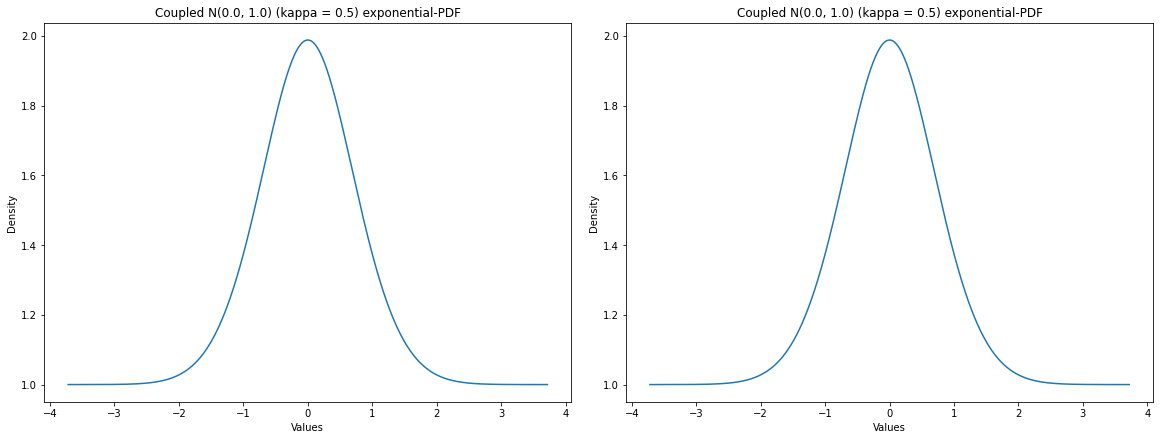

In [4]:
coupled_norm_exponential_densities = fj.coupled_exponential(coupled_norm, kappa=kappa, dim=dim)
coupled_other_norm_exponential_densities = fj.coupled_exponential(coupled_other_norm, kappa=kappa, dim=dim)

fig, ax = plt.subplots(1, 2, figsize=(16,6), constrained_layout=True)

ax[0].plot(x, coupled_norm_exponential_densities)
ax[0].set_title(f'Coupled N({normal.mean()}, {normal.std()}) (kappa = {kappa}) exponential-PDF')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Density')

ax[1].plot(x, coupled_other_norm_exponential_densities)
ax[1].set_title(f'Coupled N({other_normal.mean()}, {other_normal.std()}) (kappa = {kappa}) exponential-PDF')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('Density')

plt.show()

In [5]:
fj.coupled_cross_entropy(coupled_other_norm, coupled_norm, dx=dx, kappa=kappa, alpha=alpha, dim=dim, root=False)

1.0092482860678536

In [6]:
fj.coupled_cross_entropy(coupled_other_norm, coupled_norm, dx=dx, kappa=kappa, alpha=alpha, dim=dim, root=True)

1.3489178311598082

In [7]:
(fj.coupled_entropy(coupled_other_norm, dx=dx, kappa=kappa, alpha=alpha, dim=dim, root=False),
 func.coupled_entropy(coupled_other_norm, kappa=kappa, alpha=alpha, d=dim, root=False, integration='trapz'))

(1.0092482860678536, 1.0092482860678538)

In [8]:
(fj.coupled_entropy(coupled_other_norm, dx=dx, kappa=kappa, alpha=alpha, dim=dim, root=True),
 func.coupled_entropy(coupled_other_norm, kappa=kappa, alpha=alpha, d=dim, root=True, integration='trapz'))

(1.3489178311598082, 1.3489178311598087)

In [9]:
fj.coupled_divergence(coupled_other_norm, coupled_norm, dx=dx, kappa=kappa, alpha=alpha, dim=dim, root=False)

0.0

In [10]:
fj.coupled_divergence(coupled_other_norm, coupled_norm, dx=dx, kappa=kappa, alpha=alpha, dim=dim, root=True)

0.0

In [11]:
from function import norm_CG 

def CoupledNormalDistribution(mean, sigma, kappa, alpha):
    """
    Short description
    
    Inputs
    ----------
    x : Input variable in which the coupled logarithm is applied to.
    mean : 
    sigma : 
    kappa : Coupling parameter which modifies the coupled logarithm function.
    dim : The dimension of x, or rank if x is a tensor. Not needed?
    """

    assert sigma > 0, "std must be greater than 0."
    assert alpha in [1, 2], "alpha must be set to either 1 or 2."

    
    if kappa >= 0:
        input = np.arange(mean-20, mean+20, (20+mean - -20+mean)/(2**16+1))
    else:
        x1 = mean - ((-1*sigma**2) / kappa)**0.5
        x2 = mean + ((-1*sigma**2) / kappa)**0.5
        input = np.arange(mean - ((-1*sigma**2) / kappa)**0.5, mean + ((-1*sigma**2) / kappa)**0.5, (x2-x1)/(2**16+1))
 
    normCGvalue = 1/float(norm_CG(sigma, kappa))
    
    coupledNormalDistributionResult = normCGvalue * (fj.coupled_exponential((input - mean)**2/sigma**2, kappa)) ** -0.5
  
    return coupledNormalDistributionResult

In [12]:
mu, sigma = 0, 1 # mean and standard deviation
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = CoupledNormalDistribution(mu, sigma, kappa, alpha)

dx = np.arange(mu-20, mu+20, (20+mu - -20+mu)/(2**16+1))[1] - np.arange(mu-20, mu+20, (20+mu - -20+mu)/(2**16+1))[0]

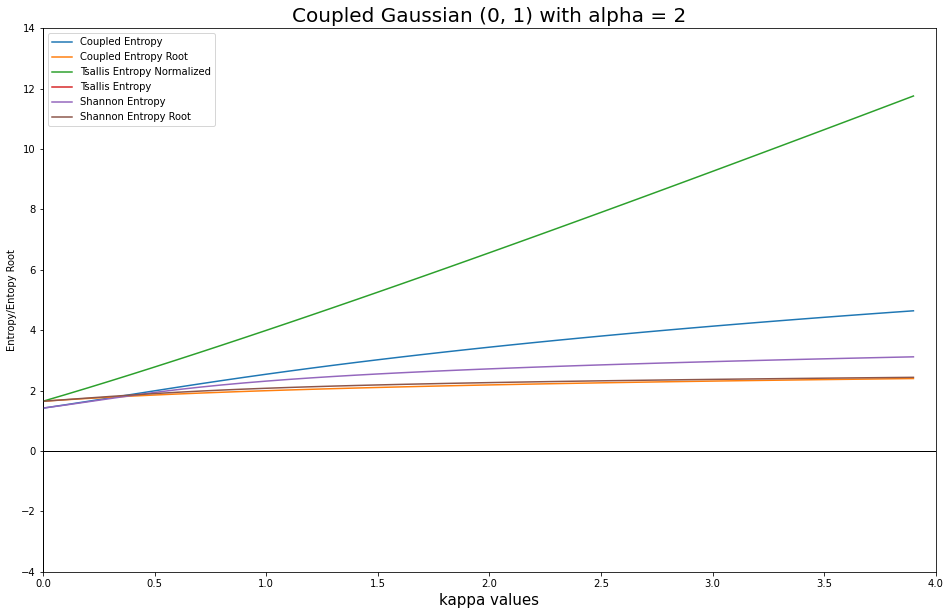

In [38]:
# plt.figure(figsize=(12, 8))
Y = {}
plot_coupledEntropy = []
plot_coupledEntropy_root = []
plot_tsallisEntropyNormalized = []
plot_tsallisEntropy = []
plot_shannonEntropy = []
plot_shannonEntropy_root = []
fig, ax = plt.subplots(figsize=(16, 10))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
kappa_values = [round(value, 1) for value in np.arange(0, 4, 0.1)]
n = len(kappa_values)

plt.xlim(0, 4)
plt.ylim(-4, 14)

mu, sigma = 0, 1
alpha = 2
for kappa in kappa_values:
    y = CoupledNormalDistribution(mu, sigma, kappa, alpha)
    Y[kappa] = fj.coupled_entropy(y, dx=dx, kappa=kappa, alpha=alpha, dim=dim, root=False)
    plot_coupledEntropy.append(Y[kappa])
    Y[kappa] = fj.coupled_entropy(y, dx=dx, kappa=kappa, alpha=alpha, dim=dim, root=True)
    plot_coupledEntropy_root.append(Y[kappa])
    Y[kappa] = fj.coupled_entropy(y, dx=dx, kappa=kappa, alpha=alpha, dim=dim, root=True)*(1+kappa)
    plot_tsallisEntropyNormalized.append(Y[kappa])
    Y[kappa] = fj.coupled_entropy(y, dx=dx, kappa=kappa, alpha=alpha, dim=dim, root=False)*(1+kappa)*np.sum(y**(1+(alpha*kappa)/(1+kappa)))
    plot_tsallisEntropy.append(Y[kappa])
    Y[kappa] = fj.coupled_entropy(y, dx=dx, kappa=0, alpha=2, dim=dim, root=False)
    plot_shannonEntropy.append(Y[kappa])
    Y[kappa] = fj.coupled_entropy(y, dx=dx, kappa=0, alpha=2, dim=dim, root=True)
    plot_shannonEntropy_root.append(Y[kappa])
    
plt.plot(kappa_values, plot_coupledEntropy, label='Coupled Entropy')
plt.plot(kappa_values, plot_coupledEntropy_root, label='Coupled Entropy Root')
plt.plot(kappa_values, plot_tsallisEntropyNormalized, label='Tsallis Entropy Normalized')
plt.plot(kappa_values, plot_tsallisEntropy, label='Tsallis Entropy')
plt.plot(kappa_values, plot_shannonEntropy, label='Shannon Entropy')
plt.plot(kappa_values, plot_shannonEntropy_root, label='Shannon Entropy Root')
plt.title(f'Coupled Gaussian {round(mu), round(sigma)} with alpha = {alpha}', fontsize=20)
plt.xlabel('kappa values', fontsize=15)
plt.ylabel('Entropy/Entopy Root')
plt.legend()
plt.show();